# Balancer Simulations Math Challenge - Basic Exercises

This is a series of exercises to gain intuition for the core algorithm in Balancer Pools: the Value Function, and invariant V.

**Exercise:** We'll work on Step 1 questions in our working session on May 25 in teams of 2, facilitated by @Octopus and @akrtws.  
**Challenges:** Step 2 will be homework assignments, submitting at least one challenge solved is mandatory for successful participation!  
Here's the notebook with challenges: https://github.com/TokenEngineeringCommunity/BalancerPools_Model/blob/fcb67145e8b0f8a1843fe3c6921dbb5a7085938e/Math%20Challenges-Advanced.ipynb

# Dependencies

In [39]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
from matplotlib.legend_handler import HandlerLine2D

## Exercise:   
Let's set up a pool.  

We have 100 Token A and 100 Token B, with equal weights.  
The price definition in our pool is constraint by the
Invariant V in Balancer Pools. 

a_bal = balance of token A  
b_bal = balance of token B  
a_weight = weight of token A  
b_weight = weight of token B   

The weights in this pool are equal for both tokens.
For now, we don't have a swap fee.

# Q1.1: 
What's the initial spot price of token A in token B?

In [2]:
a_bal = 100
b_bal = 100

a_weight = 0.5
b_weight = 0.5

# We know that the spot_price = balance of token A / balance of token B
# Therefore, the spot_price equals 1
spot_price = (a_bal/a_weight)/(b_bal/b_weight)
print(spot_price)

1.0


# Q1.2:
Now let's assume a series of 99 swaps. With every swap, **1.0 token A is bought from the pool, against token B**.  

**a) Create a table "buy_A"** with

    the token A balances (swap by swap)
    the token B balances (swap by swap) - that are constraint by the value function. 

**b) What do you notice in general?**
Write down your findings (in words).

**c) How much would Alice have to pay in token B when buying the first 1.0 token A?**
Write down your findings (in words). Compare with the initial Spotprice.

In [3]:
a_bal = 100
b_bal = 100
a_weight = 0.5
b_weight = 0.5
swap_fee= 0.0
invariant = (a_bal**a_weight)*(b_bal**b_weight)
a_values = pd.Series(range(100,0,-1))

buy_A = pd.DataFrame(a_values, columns=['token_A'])
buy_A['invariant'] = invariant
                     
buy_A['token_B'] = (buy_A.invariant/(buy_A.token_A**a_weight))**(1/b_weight)
                     
buy_A.tail(50)

,token_A,invariant,token_B
50,50,100.0,200.000000
51,49,100.0,204.081633
52,48,100.0,208.333333
53,47,100.0,212.765957
54,46,100.0,217.391304
55,45,100.0,222.222222
56,44,100.0,227.272727
57,43,100.0,232.558140
58,42,100.0,238.095238
59,41,100.0,243.902439


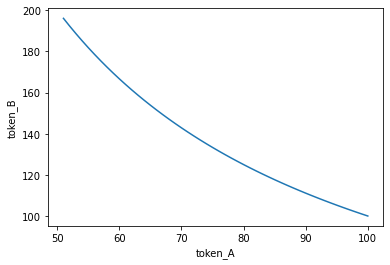

In [4]:
plt.plot(buy_A.head(50)['token_A'], buy_A.head(50)['token_B'])
plt.xlabel("token_A")
plt.ylabel("token_B")
plt.show()


# Q1.3:

Now let's assume a series of 99 swaps in the opposite direction. We start again with the original state: We have 100 Token A and 100 Token B.   
With every swap, **1.0 token B is bought from the pool, against token A**.

Create a table **'buy_B'** with

    the token A balances (swap by swap)
    the token B balances (swap by swap) - that are constraint by the value function.

In [5]:
b_values = pd.Series(range(100,0,-1))

buy_B = pd.DataFrame(b_values, columns=['token_B'])
buy_B['invariant'] = invariant

buy_B['token_A'] = (buy_B.invariant/(buy_B.token_B**b_weight))**(1/a_weight)

buy_B.tail(50)

,token_B,invariant,token_A
50,50,100.0,200.000000
51,49,100.0,204.081633
52,48,100.0,208.333333
53,47,100.0,212.765957
54,46,100.0,217.391304
55,45,100.0,222.222222
56,44,100.0,227.272727
57,43,100.0,232.558140
58,42,100.0,238.095238
59,41,100.0,243.902439


In [6]:
b_o = 100
b_i = 100
a_o = 99
a_i = b_i * (b_o/(b_o - a_o)- 1)
print(a_i)

#with swap fee
a_i = a_i * (1/(1-0.05))
print(a_i)

9900.0
10421.052631578947


# Q1.4:

a) What are the new balances of token A and token B after 90 swaps token A (in) for B (out)?

b) How much would Alice have to pay in token A in case she wants to buy the 91st token B? 

In [7]:
# a) What are the new balances of token A and token B after 90 swaps token A (in) for B (out)?
buy_B.iloc[91][['token_A', 'token_B']]

#b) How much would Alice have to pay in token A in case she wants to buy the 91st token B? 
price_to_pay = (buy_B.iloc[92]['token_A'])-((buy_B.iloc[91]['token_A']))
price_to_pay

138.88888888888823

# Q1.5:  
Now create a graph (use plotly or similar), and draw the full curve for this series of both kinds of swaps - the AMM curve.

In [8]:
buy_A

,token_A,invariant,token_B
0,100,100.0,100.000000
1,99,100.0,101.010101
2,98,100.0,102.040816
3,97,100.0,103.092784
4,96,100.0,104.166667
...,...,...,...
95,5,100.0,2000.000000
96,4,100.0,2500.000000
97,3,100.0,3333.333333
98,2,100.0,5000.000000


In [11]:
buy_B

,token_B,token_A
0,100,100.000000
1,99,101.010101
2,98,102.040816
3,97,103.092784
4,96,104.166667
...,...,...
95,5,2000.000000
96,4,2500.000000
97,3,3333.333333
98,2,5000.000000


In [18]:
merged_pool = pd.concat([buy_A,buy_B[buy_B['token_B'] <100]])
merged_pool = merged_pool.sort_values(by=['token_B'])
merged_pool = merged_pool[(merged_pool['token_A'] <= 1000) & (merged_pool['token_B'] <= 1000)]
merged_pool

,token_A,token_B
90,1000.000000,10.000000
89,909.090909,11.000000
88,833.333333,12.000000
87,769.230769,13.000000
86,714.285714,14.000000
...,...,...
86,14.000000,714.285714
87,13.000000,769.230769
88,12.000000,833.333333
89,11.000000,909.090909


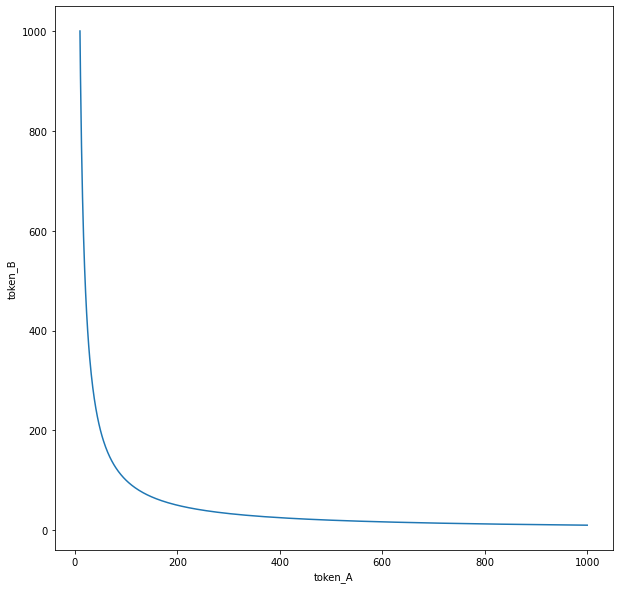

In [29]:
plt.figure(figsize=(10, 10))
plt.plot(merged_pool['token_A'], merged_pool['token_B'])
plt.xlabel("token_A")
plt.ylabel("token_B")


plt.show()

# Q1.6:
Take this plot, and mark 
- the initial price in Q1.1 (starting price)
- the new price in Q1.4 (after 90 swaps)

Side note: Why is it actually not appropriate to call this a "price". What would be a better name?

In [26]:
show = merged_pool.loc[merged_pool['token_B']== 100]
show
# initial price is 1

,token_A,token_B
0,100.0,100.0


In [28]:
show = merged_pool.loc[merged_pool['token_B']== 10]
show
# initial price is 100

,token_A,token_B
90,1000.0,10.0


# Q1.7:
Formulate a "rule of a thumb", how do swaps effect the price?

 ##### "In case of a swap, fees are charging up the pool. Generally, a swap preserves the Invariant V, in a regular pool, the swap fee charged is increasing the token price on the way in, which we can think of as a friction on the swap mechanism to ongoingly collect energy and make adding liquidity a viable long term investment — although there may be an impermanent loss."
 <img src="https://miro.medium.com/max/690/1*meOkUogoqbxrhhHcYul0eQ.jpeg" alt="Drawing" style="width: 200px;"/>

<ipython-input-34-d5e3df53c82d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_pool['spot_price_token_A'] = merged_pool['token_B'] / merged_pool['token_A']


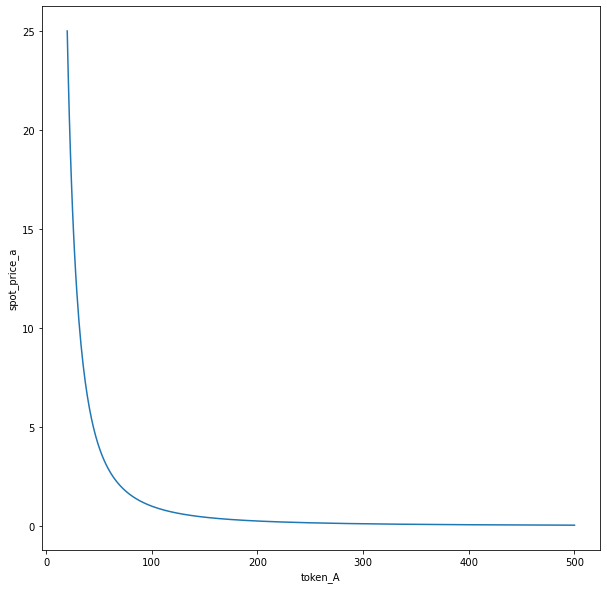

In [34]:
merged_pool['spot_price_token_A'] = merged_pool['token_B'] / merged_pool['token_A']

merged_pool = merged_pool[(merged_pool['token_A'] <= 500) & (merged_pool['token_B'] <= 500)]

plt.figure(figsize=(10,10))
plt.plot(merged_pool['token_A'], merged_pool['spot_price_token_A'])
plt.xlabel("token_A")
plt.ylabel("spot_price_a")


plt.show()

## Additional questions:

**Q1.8:** Buying A) 99 tokens at once vs. B) buying 99x 1 token
Is there a difference in terms of the number of tokens you have to swap in? Is it "more expensive" to swap 99 times?
**Answer: no, there's no difference - you pay the same amount no matter if you buy 1 at a time or 99 at once. Intuition: you are moving on the SAME curve, no matter if you take a huge leap, or walk in small steps.**

**Q1.9:** Swap fees for buying 99 tokens at once vs. buying 99x 1 token
Again, does it matter in terms of the total amount of tokens (change in balance+ fees) you have to pay?


**Q1.10:** Price changes and position at the curve
For a relative change in price, does it matter where we are at the curve? ( @mark richardson | bancor explained it very nicely, you might want to watch the recording again, will share it by tomorrow)

**Q1.11:** Price changes, position at the curve and unequal weights
What's the effect of weights on this? If weights are not equal, and we want to move prices, does it matter where we are at the curve?


## Solution Q1.9 - by @AngelaKTE (Twitter @akrtws)
Swap fees for buying 99 tokens at once vs. buying 99x 1 token Again, does it matter in terms of the total amount of tokens you have to pay/send to the pool?

**Answer: Yes, is does matter. With fees, it's more expensive to buy 99 x1 tokens.**

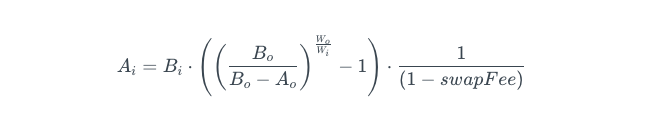

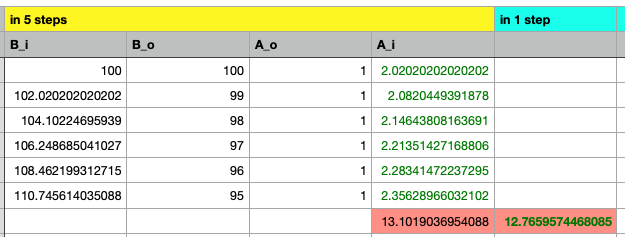

# Now, let's consider weights!

We continue with the value function V = a^w_a*b^w_b  
where  
a = balance of token asset A  
b = balancer of token asset B  
w_a = weight of token asset A  
w_b = weight of token asset B  

# Q2.1:  
Write down the value function for the pool in Q1.1!

In [30]:
a_bal = 100
b_bal = 100

a_weight = 0.5
b_weight = 0.5

value = (a_bal**a_weight)*(b_bal**b_weight)
value

100.0

# Q2.2:
Let's got back to your initial balances in Step 1 in the pool:  
100 tokens A  
100 tokens B  

How do you need to change the weights in order to land at a **price of  
4 tokens A : 1 token B**

In [31]:
a_weight = 0.2
b_weight = 0.8

spot_price = (a_bal/a_weight)/(b_bal/b_weight)
spot_price

4.0

Provide the new value function!

In [35]:
value = (a_bal**a_weight)*(b_bal**b_weight)
value

100.00000000000003

# Q2.3:
Create a graph showing the new AMM Curve in Q2.2  
Compare to the graph in Q1.4 - how does a change in weights change the graph?

In [37]:
a_bal = 100
b_bal = 100
a_weight = 0.2
b_weight = 0.8
s_f = 0.0

invariant = (a_bal**a_weight)*(b_bal**b_weight)
a_values = pd.Series(range(100,0,-1))

buy_A = pd.DataFrame(a_values, columns=['token_A'])
buy_A['invariant'] = invariant 

buy_A['token_B'] = (buy_A.invariant/(buy_A.token_A**a_weight))**(1/b_weight)

b_values = pd.Series(range(100,0,-1))
buy_B = pd.DataFrame(b_values, columns=['token_B'])
buy_B['invariant'] = invariant

buy_B['token_A'] = (buy_B.invariant/(buy_B.token_B**b_weight))**(1/a_weight)

merged_weight = pd.concat([buy_A, buy_B[buy_B['token_B'] < 100]])
merged_weight = merged_weight.sort_values(by=['token_B'])
merged_weight_1 = merged_weight[(merged_weight['token_A'] <= 500) & (merged_weight['token_B'] <= 500 )]

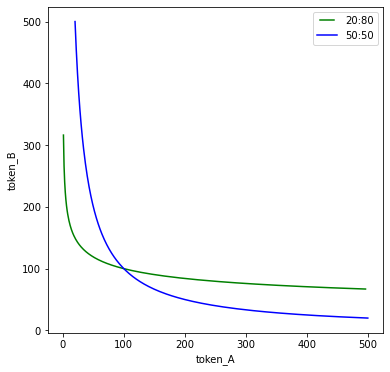

In [40]:
plt.figure(figsize=(6, 6))
line1, = plt.plot(merged_weight_1['token_A'], merged_weight_1['token_B'], color='green', label="20:80")
line2, = plt.plot(merged_pool['token_A'], merged_pool['token_B'], color='blue', label="50:50")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

plt.xlabel("token_A")
plt.ylabel("token_B")


plt.show()

# Q2.4:
Compare token prices in this pool.  
How much would Alice have to pay in case there are only 2 tokens left in the pool  
    **a) buy 1.0 token A for token B**  
    **b) buy 1.0 token B for token A**   

In [43]:
a_bal_left = 2.0
b_bal_left = buy_A.loc[buy_A['token_A']== 2]['token_B']
spot_price = b_bal_left / a_bal_left

b_bal_left_1 = (invariant/(a_bal_left - 1)**a_weight)**(1/b_weight)
effective_price = b_bal_left_1 - b_bal_left
spot_price

98    132.957397
Name: token_B, dtype: float64

In [44]:
effective_price

98    50.312971
Name: token_B, dtype: float64